# The Grammar of Graphics: Plotnine

### Setup

In [4]:
#!pip install plotnine
#!pip install mizani
#!pip install adjustText
#!pip install geopandas
#!pip install requests

In [49]:
from plotnine import *
from plotnine.data import anscombe_quartet
from mizani.formatters import percent_format
import mizani.labels as ml
import pandas as pd
import geopandas as gp
import requests
from adjustText import adjust_text

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_columns', None)

### Example using Anscombe Quartet data set

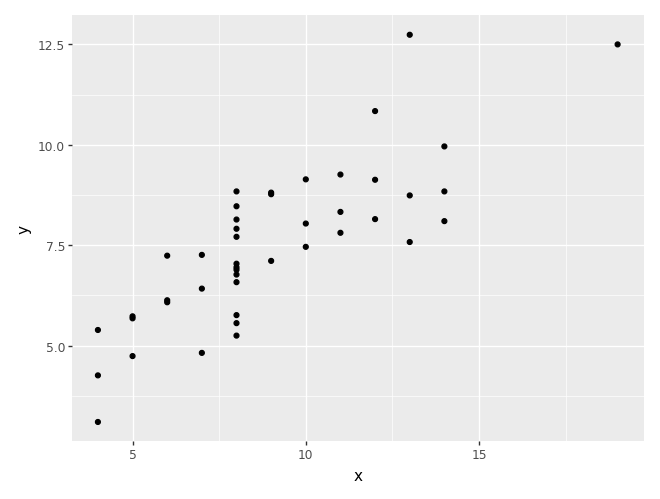

In [6]:
# Plot all data together
ggplot(anscombe_quartet, aes(x="x", y="y")) + geom_point()

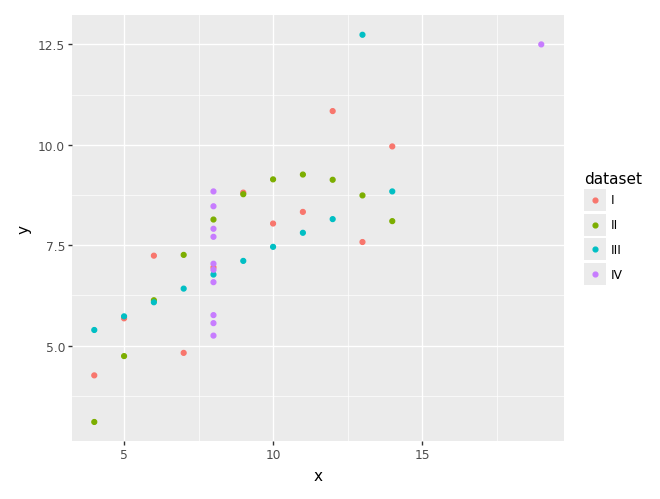

In [7]:
# Separate data sets with different colors
ggplot(anscombe_quartet, aes(x="x", y="y", color="dataset")) + geom_point()

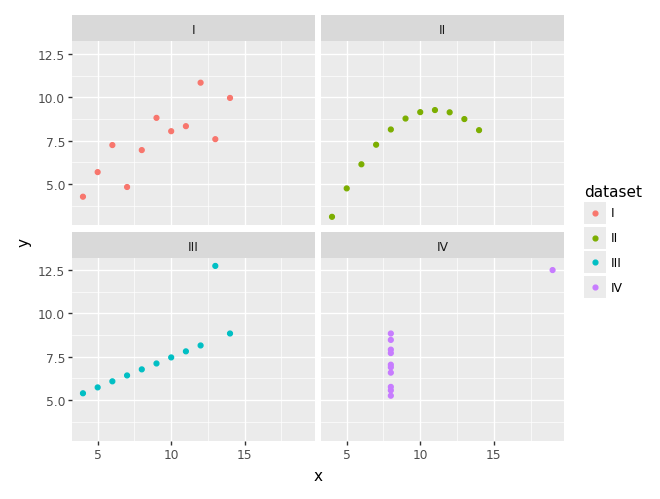

In [ ]:
# Separate data sets with facet_wrap
(
    ggplot(anscombe_quartet, aes(x="x", y="y", color="dataset")) 
    + geom_point() 
    + facet_wrap("dataset")
)

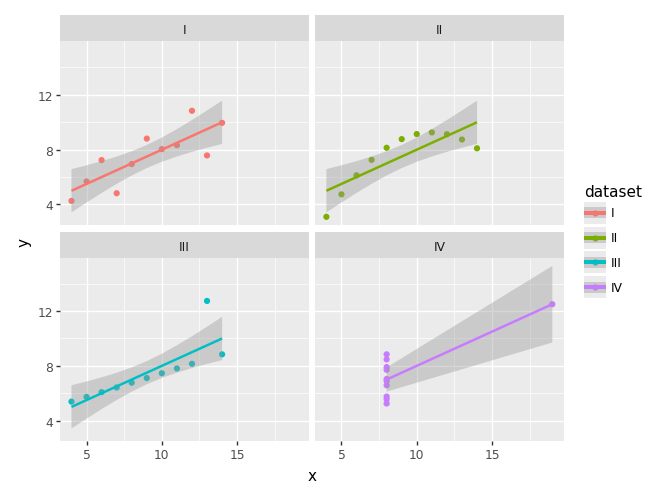

In [ ]:
# Add linear regression lines
(
    ggplot(anscombe_quartet, aes(x="x", y="y", color="dataset")) 
    + geom_point() + geom_smooth(method = "lm", formula = "y ~ x") 
    + facet_wrap("dataset")
)

## Visualizing STAAR Research Portal Data

### Download and prepare the data

In [10]:
# Load STAAR research portal data
url_district = 'https://raw.githubusercontent.com/brussell23/grammar_of_graphics/refs/heads/main/staar_district_g8_y25_math.csv'
staar_district = pd.read_csv(url_district, delimiter=',')
staar_district.head()

,Organization,ID/CDC,Administration,Tested Grade,STAAR - Mathematics|Tests Taken,STAAR - Mathematics|Average Scale Score,STAAR - Mathematics|Performance Levels|Did Not Meet|Count,STAAR - Mathematics|Performance Levels|Did Not Meet|Percentage,STAAR - Mathematics|Performance Levels|Approaches and Above|Count,STAAR - Mathematics|Performance Levels|Approaches and Above|Percentage,STAAR - Mathematics|Performance Levels|Meets and Above|Count,STAAR - Mathematics|Performance Levels|Meets and Above|Percentage,STAAR - Mathematics|Performance Levels|Masters|Count,STAAR - Mathematics|Performance Levels|Masters|Percentage
0,A+ ACADEMY,57829,Spring 2025,8,112,1751.0,64.0,57.0,48.0,43.0,18.0,16.0,1.0,1.0
1,A+ UNLIMITED POTENTIAL,101871,Spring 2025,8,19,1703.0,14.0,74.0,5.0,26.0,1.0,5.0,0.0,0.0
2,ABBOTT ISD,109901,Spring 2025,8,22,1895.0,2.0,9.0,20.0,91.0,9.0,41.0,5.0,23.0
3,ABERNATHY ISD,95901,Spring 2025,8,33,1895.0,7.0,21.0,26.0,79.0,21.0,64.0,8.0,24.0
4,ABILENE ISD,221901,Spring 2025,8,1108,1809.0,464.0,42.0,644.0,58.0,354.0,32.0,100.0,9.0


In [11]:
# Change STAAR % to decimal
staar_district['STAAR - Mathematics|Performance Levels|Did Not Meet|Percentage'] = staar_district['STAAR - Mathematics|Performance Levels|Did Not Meet|Percentage']/100
staar_district['STAAR - Mathematics|Performance Levels|Approaches and Above|Percentage'] = staar_district['STAAR - Mathematics|Performance Levels|Approaches and Above|Percentage']/100
staar_district['STAAR - Mathematics|Performance Levels|Meets and Above|Percentage'] = staar_district['STAAR - Mathematics|Performance Levels|Meets and Above|Percentage']/100
staar_district['STAAR - Mathematics|Performance Levels|Masters|Percentage'] = staar_district['STAAR - Mathematics|Performance Levels|Masters|Percentage']/100

In [12]:
url_state = 'https://raw.githubusercontent.com/brussell23/grammar_of_graphics/refs/heads/main/staar_state_g3_g8_y21_y25_math_rla.csv'
staar_state = pd.read_csv(url_state, delimiter=',')
staar_state.head()

,Organization,ID/CDC,Administration,Tested Grade,STAAR - Mathematics|Tests Taken,STAAR - Mathematics|Average Scale Score,STAAR - Mathematics|Performance Levels|Did Not Meet|Count,STAAR - Mathematics|Performance Levels|Did Not Meet|Percentage,STAAR - Mathematics|Performance Levels|Approaches and Above|Count,STAAR - Mathematics|Performance Levels|Approaches and Above|Percentage,STAAR - Mathematics|Performance Levels|Meets and Above|Count,STAAR - Mathematics|Performance Levels|Meets and Above|Percentage,STAAR - Mathematics|Performance Levels|Masters|Count,STAAR - Mathematics|Performance Levels|Masters|Percentage,STAAR - Reading|Tests Taken,STAAR - Reading|Average Scale Score,STAAR - Reading|Performance Levels|Did Not Meet|Count,STAAR - Reading|Performance Levels|Did Not Meet|Percentage,STAAR - Reading|Performance Levels|Approaches and Above|Count,STAAR - Reading|Performance Levels|Approaches and Above|Percentage,STAAR - Reading|Performance Levels|Meets and Above|Count,STAAR - Reading|Performance Levels|Meets and Above|Percentage,STAAR - Reading|Performance Levels|Masters|Count,STAAR - Reading|Performance Levels|Masters|Percentage
0,STATE,NaN,Spring 2025,3,376511,1460,113055,30,263456,70,168974,45,72651,19,363696,1477,80819,22,282877,78,189705,52,84498,23
1,STATE,NaN,Spring 2025,4,381087,1565,120862,32,260225,68,174484,46,90950,24,371514,1555,69213,19,302301,81,199738,54,88802,24
2,STATE,NaN,Spring 2025,5,383302,1641,103311,27,279991,73,177252,46,84011,22,378299,1610,88276,23,290023,77,218941,58,114344,30
3,STATE,NaN,Spring 2025,6,390074,1721,108579,28,281495,72,146977,38,59859,15,396501,1650,97428,25,299073,75,215067,54,111226,28
4,STATE,NaN,Spring 2025,7,299218,1753,143351,48,155867,52,93135,31,31350,10,398260,1667,103022,26,295238,74,206143,52,105606,27


In [13]:
# Change STAAR percentages to decimals
staar_state['STAAR - Mathematics|Performance Levels|Did Not Meet|Percentage'] = staar_state['STAAR - Mathematics|Performance Levels|Did Not Meet|Percentage']/100
staar_state['STAAR - Mathematics|Performance Levels|Approaches and Above|Percentage'] = staar_state['STAAR - Mathematics|Performance Levels|Approaches and Above|Percentage']/100
staar_state['STAAR - Mathematics|Performance Levels|Meets and Above|Percentage'] = staar_state['STAAR - Mathematics|Performance Levels|Meets and Above|Percentage']/100
staar_state['STAAR - Mathematics|Performance Levels|Masters|Percentage'] = staar_state['STAAR - Mathematics|Performance Levels|Masters|Percentage']/100
staar_state['STAAR - Reading|Performance Levels|Did Not Meet|Percentage'] = staar_state['STAAR - Reading|Performance Levels|Did Not Meet|Percentage']/100
staar_state['STAAR - Reading|Performance Levels|Approaches and Above|Percentage'] = staar_state['STAAR - Reading|Performance Levels|Approaches and Above|Percentage']/100
staar_state['STAAR - Reading|Performance Levels|Meets and Above|Percentage'] = staar_state['STAAR - Reading|Performance Levels|Meets and Above|Percentage']/100
staar_state['STAAR - Reading|Performance Levels|Masters|Percentage'] = staar_state['STAAR - Reading|Performance Levels|Masters|Percentage']/100

In [14]:
# Create year column
staar_state["Year"] = staar_state["Administration"].str[-4:].astype('int64')
staar_state.head()
staar_state["Year"].value_counts()
#staar_state.dtypes

,Organization,ID/CDC,Administration,Tested Grade,STAAR - Mathematics|Tests Taken,STAAR - Mathematics|Average Scale Score,STAAR - Mathematics|Performance Levels|Did Not Meet|Count,STAAR - Mathematics|Performance Levels|Did Not Meet|Percentage,STAAR - Mathematics|Performance Levels|Approaches and Above|Count,STAAR - Mathematics|Performance Levels|Approaches and Above|Percentage,STAAR - Mathematics|Performance Levels|Meets and Above|Count,STAAR - Mathematics|Performance Levels|Meets and Above|Percentage,STAAR - Mathematics|Performance Levels|Masters|Count,STAAR - Mathematics|Performance Levels|Masters|Percentage,STAAR - Reading|Tests Taken,STAAR - Reading|Average Scale Score,STAAR - Reading|Performance Levels|Did Not Meet|Count,STAAR - Reading|Performance Levels|Did Not Meet|Percentage,STAAR - Reading|Performance Levels|Approaches and Above|Count,STAAR - Reading|Performance Levels|Approaches and Above|Percentage,STAAR - Reading|Performance Levels|Meets and Above|Count,STAAR - Reading|Performance Levels|Meets and Above|Percentage,STAAR - Reading|Performance Levels|Masters|Count,STAAR - Reading|Performance Levels|Masters|Percentage,Year
0,STATE,NaN,Spring 2025,3,376511,1460,113055,0.30,263456,0.70,168974,0.45,72651,0.19,363696,1477,80819,0.22,282877,0.78,189705,0.52,84498,0.23,2025
1,STATE,NaN,Spring 2025,4,381087,1565,120862,0.32,260225,0.68,174484,0.46,90950,0.24,371514,1555,69213,0.19,302301,0.81,199738,0.54,88802,0.24,2025
2,STATE,NaN,Spring 2025,5,383302,1641,103311,0.27,279991,0.73,177252,0.46,84011,0.22,378299,1610,88276,0.23,290023,0.77,218941,0.58,114344,0.30,2025
3,STATE,NaN,Spring 2025,6,390074,1721,108579,0.28,281495,0.72,146977,0.38,59859,0.15,396501,1650,97428,0.25,299073,0.75,215067,0.54,111226,0.28,2025
4,STATE,NaN,Spring 2025,7,299218,1753,143351,0.48,155867,0.52,93135,0.31,31350,0.10,398260,1667,103022,0.26,295238,0.74,206143,0.52,105606,0.27,2025


Year
2025    6
2024    6
2023    6
2022    6
2021    4
Name: count, dtype: int64

#### Merge with district snapshot

In [15]:
# Load district snapshot data
url_snapshot = 'https://raw.githubusercontent.com/brussell23/grammar_of_graphics/refs/heads/main/district_snapshot_2223.csv'
district_snapshot = pd.read_csv(url_snapshot)
# Change percentages to decimals
district_snapshot['DPETECOP'] = district_snapshot['DPETECOP']/100
district_snapshot['DPETLEPP'] = district_snapshot['DPETLEPP']/100
district_snapshot.head()

,DISTNAME,DISTRICT,DZCNTYNM,REGION,DZCAMPUS,DPETALLC,DPETBLAP,DPETHISP,DPETWHIP,DPETINDP,DPETASIP,DPETPCIP,DPETTWOP,DPETECOP,DPETLEPP,DPETSPEP,DPETBILP,DPETVOCP,DPETGIFP,DA0AT22R,DA0912DR22R,DAGC4X22R,DAGC5X21R,DAGC6X20R,DA0GR22N,DA0GS22N,DDA00A001S23R,DDA00A001223R,DDA00A001323R,DDA00AR01S23R,DDA00AR01223R,DDA00AR01323R,DDA00AM01S23R,DDA00AM01223R,DDA00AM01323R,DDA00AC01S23R,DDA00AC01223R,DDA00AC01323R,DDA00AS01S23R,DDA00AS01223R,DDA00AS01323R,DDB00A001S23R,DDB00A001223R,DDB00A001323R,DDH00A001S23R,DDH00A001223R,DDH00A001323R,DDW00A001S23R,DDW00A001223R,DDW00A001323R,DDI00A001S23R,DDI00A001223R,DDI00A001323R,DD300A001S23R,DD300A001223R,DD300A001323R,DD400A001S23R,DD400A001223R,DD400A001323R,DD200A001S23R,DD200A001223R,DD200A001323R,DDE00A001S23R,DDE00A001223R,DDE00A001323R,DA0CT22R,DA0CC22R,dA0csa22r,dA0caa22r,DPSATOFC,DPSTTOFC,DPSCTOFP,DPSSTOFP,DPSUTOFP,DPSTTOFP,DPSETOFP,DPSXTOFP,DPSCTOSA,DPSSTOSA,DPSUTOSA,DPSTTOSA,DPSAMIFP,DPSAKIDR,DPSTKIDR,DPST05FP,DPSTEXPA,DPSTADFP,DPSTURNR,DPSTBLFP,DPSTHIFP,DPSTWHFP,DPSTINFP,DPSTASFP,DPSTPIFP,DPSTTWFP,DPSTREFP,DPSTSPFP,DPSTCOFP,DPSTBIFP,DPSTVOFP,DPSTGOFP,DPFVTOTK,DPFTADPR,DPFRAALLT,DPFRAALLK,DPFRAOPRT,DPFRASTAP,DZRVLOCP,DPFRAFEDP,DPFRAORVT,DPFUNAB1T,DPFUNA4T,DPFEAALLT,DPFEAOPFT,DPFEAOPFK,DPFEAINSP,DZEXADMP,DZEXADSP,DZEXPLAP,DZEXOTHP,DPFEAINST,DPFEAINSK,DPFPAREGP,DPFPASPEP,DPFPACOMP,DPFPABILP,DPFPAVOCP,DPFPAGIFP,DPFPAATHP,DPFPAHSAP,DPFPREKP,DPFPAOTHP,DISTSIZE,COMMTYPE,PROPWLTH,TAXRATE
0,CAYUGA ISD,1902,001 ANDERSON,7,3,593,4.7,9.4,80.8,0.0,0.5,0.0,4.6,0.497,0.013,14.0,1.3,28.3,5.1,95.3,0.0,97.8,100.0,100.0,46.0,44.0,86.0,61.0,23.0,89.0,69.0,28.0,84.0,61.0,26.0,85.0,54.0,15.0,80.0,40.0,10.0,67.0,43.0,7.0,83.0,55.0,20.0,87.0,63.0,25.0,NaN,NaN,NaN,-1.0,-1.0,-1.0,NaN,NaN,NaN,86.0,60.0,14.0,82.0,54.0,16.0,63.0,27.6,1009.0,-1.0,102.0,48.4,1.5,3.6,6.2,47.5,16.2,25.1,94667.0,73737.0,57090.0,56317.0,12.5,5.8,12.3,15.8,14.5,21.3,14.7,4.0,0.0,96.0,0.0,0.0,0.0,0.0,85.4,6.7,0.0,0.0,7.9,0.0,533212.0,1.038,11722948.0,20423.0,11722948.0,35.9,41.5,22.6,0.0,4497879.0,0.0,10018063.0,9697033.0,16894.0,49.3,10.1,3.7,10.6,26.3,4780251.0,8328.0,30.5,26.6,9.2,0.1,4.0,0.0,3.8,0.0,0.0,24.2,500 to 999,Rural,"$523,458 to < $547,824",Under $1.0600
1,ELKHART ISD,1903,001 ANDERSON,7,4,1194,4.0,11.3,79.3,0.3,0.5,0.1,4.5,0.590,0.029,13.7,2.9,21.9,4.7,95.1,0.0,100.0,100.0,98.9,69.0,69.0,84.0,55.0,21.0,83.0,60.0,22.0,82.0,48.0,15.0,85.0,58.0,24.0,88.0,61.0,30.0,45.0,23.0,3.0,81.0,47.0,17.0,86.0,58.0,22.0,100.0,80.0,60.0,100.0,71.0,43.0,-1.0,-1.0,-1.0,80.0,48.0,18.0,73.0,41.0,15.0,44.9,41.9,1021.0,-1.0,189.0,104.5,1.1,2.4,5.2,55.3,16.7,19.3,104408.0,78458.0,60509.0,47305.0,13.2,6.3,11.4,25.8,13.1,14.8,17.1,3.8,6.7,89.5,0.0,0.0,0.0,0.0,69.5,9.7,5.2,0.7,13.5,1.4,278083.0,1.244,17049406.0,14826.0,16091795.0,61.2,23.9,15.0,957611.0,5142151.0,0.0,17979102.0,14729781.0,12809.0,57.7,6.9,5.3,10.8,19.4,8496231.0,7388.0,41.6,8.2,6.5,0.1,8.4,0.0,3.7,0.0,0.0,29.3,"1,000 to 1,599",Non-metropolitan Stable,"$251,917 to < $316,888",$1.1800 to under $1.3001
2,FRANKSTON ISD,1904,001 ANDERSON,7,3,801,8.0,11.4,75.0,0.6,0.9,0.0,4.1,0.588,0.044,14.5,4.4,44.3,6.5,95.1,0.8,97.8,95.2,100.0,45.0,43.0,84.0,56.0,21.0,86.0,59.0,22.0,83.0,55.0,18.0,83.0,54.0,24.0,85.0,50.0,22.0,80.0,45.0,10.0,74.0,51.0,15.0,86.0,58.0,23.0,100.0,71.0,14.0,100.0,62.0,23.0,NaN,NaN,NaN,85.0,44.0,19.0,80.0,49.0,15.0,95.6,32.6,1016.0,-1.0,141.7,68.0,1.4,4.0,1.9,48.0,16.0,28.7,107716.0,73441.0,59435.0,52574.0,11.8,5.7,11.8,35.9,11.3,20.2,24.5,2.9,2.9,94.1,0.0,0.0,0.0,0.0,86.4,8.2,4.0,0.0,1.3,0.0,420387.0,1.259,13631031.0,16870.0,12716801.0,54.3,24.2,21.5,914230.0,4695391.0,0.0,12681877.0,11253313.0,13927.0,51.6,7.8,5.5,16.2,19.0,5801693.0,7180.0,27.6,8.0,15.7,0.2,5.3,0.1,6.0,0.0,1.7,33.7,500 to 999,Rural,"$399,525 to < $437,254",$1.1800 to under $1.3001
3,NECHES ISD,1906,001 ANDERSON,7,2,309,7.4,12.6,77.0,0.3,0.3,0.0,2.3,0.563,0.023,12.0,1.9,41.4,7.1,93.8,0.0,100.0,100.0,97.0,24.0,18.0,88.0,60.0,18.0,91.0,58.0,15.0,84.0,65.0,26.0,80.0,58.0,15.0,92.0,60.0,12.0,78.0,41.0,5.0,89.

In [16]:
# Inner join staar district data with snapshot
district_df = pd.merge(staar_district, district_snapshot, how = 'inner', left_on = 'ID/CDC', right_on = 'DISTRICT')
district_df.head()

,Organization,ID/CDC,Administration,Tested Grade,STAAR - Mathematics|Tests Taken,STAAR - Mathematics|Average Scale Score,STAAR - Mathematics|Performance Levels|Did Not Meet|Count,STAAR - Mathematics|Performance Levels|Did Not Meet|Percentage,STAAR - Mathematics|Performance Levels|Approaches and Above|Count,STAAR - Mathematics|Performance Levels|Approaches and Above|Percentage,STAAR - Mathematics|Performance Levels|Meets and Above|Count,STAAR - Mathematics|Performance Levels|Meets and Above|Percentage,STAAR - Mathematics|Performance Levels|Masters|Count,STAAR - Mathematics|Performance Levels|Masters|Percentage,DISTNAME,DISTRICT,DZCNTYNM,REGION,DZCAMPUS,DPETALLC,DPETBLAP,DPETHISP,DPETWHIP,DPETINDP,DPETASIP,DPETPCIP,DPETTWOP,DPETECOP,DPETLEPP,DPETSPEP,DPETBILP,DPETVOCP,DPETGIFP,DA0AT22R,DA0912DR22R,DAGC4X22R,DAGC5X21R,DAGC6X20R,DA0GR22N,DA0GS22N,DDA00A001S23R,DDA00A001223R,DDA00A001323R,DDA00AR01S23R,DDA00AR01223R,DDA00AR01323R,DDA00AM01S23R,DDA00AM01223R,DDA00AM01323R,DDA00AC01S23R,DDA00AC01223R,DDA00AC01323R,DDA00AS01S23R,DDA00AS01223R,DDA00AS01323R,DDB00A001S23R,DDB00A001223R,DDB00A001323R,DDH00A001S23R,DDH00A001223R,DDH00A001323R,DDW00A001S23R,DDW00A001223R,DDW00A001323R,DDI00A001S23R,DDI00A001223R,DDI00A001323R,DD300A001S23R,DD300A001223R,DD300A001323R,DD400A001S23R,DD400A001223R,DD400A001323R,DD200A001S23R,DD200A001223R,DD200A001323R,DDE00A001S23R,DDE00A001223R,DDE00A001323R,DA0CT22R,DA0CC22R,dA0csa22r,dA0caa22r,DPSATOFC,DPSTTOFC,DPSCTOFP,DPSSTOFP,DPSUTOFP,DPSTTOFP,DPSETOFP,DPSXTOFP,DPSCTOSA,DPSSTOSA,DPSUTOSA,DPSTTOSA,DPSAMIFP,DPSAKIDR,DPSTKIDR,DPST05FP,DPSTEXPA,DPSTADFP,DPSTURNR,DPSTBLFP,DPSTHIFP,DPSTWHFP,DPSTINFP,DPSTASFP,DPSTPIFP,DPSTTWFP,DPSTREFP,DPSTSPFP,DPSTCOFP,DPSTBIFP,DPSTVOFP,DPSTGOFP,DPFVTOTK,DPFTADPR,DPFRAALLT,DPFRAALLK,DPFRAOPRT,DPFRASTAP,DZRVLOCP,DPFRAFEDP,DPFRAORVT,DPFUNAB1T,DPFUNA4T,DPFEAALLT,DPFEAOPFT,DPFEAOPFK,DPFEAINSP,DZEXADMP,DZEXADSP,DZEXPLAP,DZEXOTHP,DPFEAINST,DPFEAINSK,DPFPAREGP,DPFPASPEP,DPFPACOMP,DPFPABILP,DPFPAVOCP,DPFPAGIFP,DPFPAATHP,DPFPAHSAP,DPFPREKP,DPFPAOTHP,DISTSIZE,COMMTYPE,PROPWLTH,TAXRATE
0,A+ ACADEMY,57829,Spring 2025,8,112,1751.0,64.0,0.57,48.0,0.43,18.0,0.16,1.0,0.01,A+ ACADEMY,57829,057 DALLAS,10,2,1588,3.3,94.0,1.8,0.0,0.3,0.0,0.6,0.935,0.542,11.0,52.1,26.4,5.5,92.8,0.7,95.9,98.9,98.8,94.0,94.0,62.0,29.0,6.0,64.0,35.0,7.0,62.0,25.0,6.0,56.0,21.0,3.0,62.0,34.0,9.0,62.0,28.0,9.0,62.0,29.0,6.0,68.0,38.0,13.0,NaN,NaN,NaN,42.0,25.0,0.0,NaN,NaN,NaN,55.0,45.0,9.0,63.0,29.0,6.0,100.0,12.0,873.0,13.7,218.9,90.9,1.4,4.0,10.6,41.5,13.3,29.2,131210.0,98517.0,76411.0,64613.0,65.7,7.3,17.5,39.2,10.0,35.6,35.2,33.8,19.7,41.0,2.2,2.2,0.0,1.1,66.4,18.3,4.4,1.2,4.9,4.9,0.0,0.000,22301889.0,14379.0,22301889.0,74.5,1.0,24.5,0.0,0.0,3282033.0,21238279.0,19975907.0,12879.0,45.3,7.4,7.5,17.3,22.6,9058029.0,5840.0,22.2,9.5,20.8,3.2,3.6,0.3,1.4,0.0,0.0,34.4,"1,000 to 1,599",Charters,Non-taxing entities,Non-taxing entities
1,A+ UNLIMITED POTENTIAL,101871,Spring 2025,8,19,1703.0,14.0,0.74,5.0,0.26,1.0,0.05,0.0,0.00,A+ UNLIMITED POTENTIAL,101871,101 HARRIS,4,1,156,54.5,41.0,3.8,0.0,0.0,0.0,0.6,0.750,0.032,19.2,3.2,0.6,0.0,91.0,NaN,NaN,NaN,NaN,NaN,NaN,71.0,41.0,18.0,84.0,51.0,22.0,60.0,30.0,13.0,69.0,40.0,15.0,71.0,42.0,22.0,68.0,40.0,15.0,76.0,44.0,22.0,72.0,28.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0,71.0,41.0,17.0,NaN,NaN,NaN,NaN,19.9,11.0,14.0,2.5,0.0,55.4,15.1,13.0,99235.0,96252.0,NaN,66045.0,66.3,7.8,14.2,100.0,2.6,40.9,45.1,63.6,0.0,27.3,0.0,9.1,0.0,0.0,90.9,9.1,0.0,0.0,0.0,0.0,0.0,0.000,2736607.0,18873.0,2736607.0,56.7,16.2,27.1,0.0,0.0,825211.0,2753102.0,2735217.0,18864.0,39.6,11.0,13.6,28.1,7.8,1082144.0,7463.0,30.3,9.4,16.2,0.2,0.0,0.0,0.0,0.0,0.0,43.7,Under 500,Charters,Non-taxing entities,Non-taxing entities
2,ABBOTT ISD,109901,Spring 2025,8,22,1895.0,2.0,0.09,20.0,0.91,9.0,0.41,5.0,0.23,ABBOTT ISD,109901,109 HILL,12,1,286,1.4,14.3,82.5,0.0,0.0,0.0,1.7,0.269,0.003,13.3,0.3,36.0,7.0,96.6,0.0,100.0,94.4,100.0,27.0,23.0,89.0,63.0,26.0,90.0,68.0,28.0,89.0,62.0,27.0,91.0,51.0,16.0,86.0,61

### (1) Scatterplots and line graphs

In [ ]:
# Statewide % Meets Math across years
(
    ggplot(staar_state, aes()) 
    + geom_#scatterplot
)

In [ ]:
# District % Meets Math vs % Ecodis
(
    ggplot(district_df, aes()) 
    + geom_#scatterplot
)

In [ ]:
# Add smoothed or OLS regression line through this plot
(
    ggplot(district_df, aes()) 
    + geom_#scatterplot 
    + geom_smooth(color = "blue")
    # Add regression line
    #+ geom_smooth(method = "lm", color = "red")
)

In [ ]:
# Scatterplot of % Meets Math vs District % English Learners
(
    ggplot(district_df, aes()) 
    + geom_#scatterplot
    + geom_smooth(color = "blue")
    #+ geom_smooth(method = "lm", color = "red")
)

#### Separate by grade level

In [ ]:
(
    ggplot(staar_state, aes()) 
    + geom_#scatterplot
)

#### Different colored points are hard to see, try line graphs

In [ ]:
# Math
(
    ggplot(staar_state, aes()) 
    + geom_#line graph
)

In [ ]:
# Reading
(
    ggplot(staar_state, aes()) 
    + geom_#line graph
)

### (2) Histograms, Boxplots, and Dotplots

In [ ]:
(
    ggplot(staar_district, aes()) 
    + geom_# #
)

#### Separate histograms by Region

In [ ]:
(
    ggplot(district_df, aes()) 
    + geom_# #
    # automatically create separate graphs for each group
    + facet_wrap()
)

#### Boxplots and Dotplots by Region

In [ ]:
(
    ggplot(district_df, aes()) 
    + geom_# #
    + facet_wrap()
)

In [ ]:
(
    ggplot(district_df, aes()) 
    + geom_# #(binaxis = "y", stackdir = "center") 
    + facet_wrap()
)

### (3) Labels and Pretty Graphs

In [ ]:
# Let's make some nicely formatted graphs
(
    ggplot(district_df, aes(x = "DPETECOP", y = "STAAR - Mathematics|Performance Levels|Meets and Above|Percentage")) 
    + geom_point() 
    + geom_smooth(color = "blue") 
    # Label x-axis, y-axis, and title
    + labs() 
    + scale_x_continuous(labels=percent_format())
    + scale_y_continuous(labels=percent_format())
)

In [ ]:
# Categorical variables are assigned colors differently than numeric variables
staar_state['Tested Grade'] = pd.Categorical(staar_state['Tested Grade'])
(
    ggplot(staar_state, aes(x = "Year", y = "STAAR - Mathematics|Performance Levels|Meets and Above|Percentage", group = "Tested Grade", color = "Tested Grade")) 
    + geom_line() 
    + labs()
    + scale_y_continuous(labels = ml.percent)
)

(
    ggplot(staar_state, aes(x = "Year", y = "STAAR - Reading|Performance Levels|Meets and Above|Percentage", group = "Tested Grade", color = "Tested Grade")) 
    + geom_line() 
    + labs()
    + scale_y_continuous(labels = ml.percent)
)

### Bonus: Visualizing Spatial Data

In [ ]:
# Load district shapefiles
district_shapefile_url = "https://services2.arcgis.com/5MVN2jsqIrNZD4tP/arcgis/rest/services/Current_Districts/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json"
district_geodata = gp.read_file(district_shapefile_url)
district_geodata.head()

In [ ]:
# Basic district polygon map
ggplot(district_geodata) + geom_map(fill = "#0d6cb9")

In [ ]:
# District shapefile merged with district staar/snapshot
district_df_geo = pd.merge(district_geodata, district_df, how = 'inner', left_on = 'DISTRICT_N', right_on = 'DISTRICT', suffixes = ("_geo", ""))
district_df_geo['COMMTYPE'] = pd.Categorical(district_df_geo['COMMTYPE'])
district_df_geo.head()

In [ ]:
# STAAR % Meets Map
(
    ggplot(district_df_geo) 
    + geom_map(aes()) 
    + scale_fill_continuous(labels = ml.percent)
    + labs()
)
# District % Economically Disadvantaged Map
(
    ggplot(district_df_geo) 
    + geom_map(aes()) 
    + scale_fill_continuous(labels = ml.percent) 
    + labs() 
)

In [ ]:
# District Types: Categorical Variable and customizing aspect ratio and size
(
    ggplot(district_df_geo) 
    + geom_map(aes())
    + theme(aspect_ratio = 1, figure_size = (10,10))
    # Add title for Legend (fill)
    + labs()
)

### STAAR trends with text labels and STAAR Redesign marked

In [ ]:
# STAAR trends with text labels and rectangle for STAAR Redesign
staar_state['math_meets'] = staar_state['STAAR - Mathematics|Performance Levels|Meets and Above|Percentage']
(
    ggplot(staar_state, aes(x = "Year", y = "STAAR - Mathematics|Performance Levels|Meets and Above|Percentage", group = "Tested Grade", color = "Tested Grade")) 
    + geom_line() 
    # Create rectangle to show timing of STAAR Redesign in 2023
      # Includes x and y min/max values, fill color, and alpha for opacity (0 to 1)
    + annotate("rect", ) 
    # Add text labels to each data point
      # Requires x/y coordinates and the column for the label text (label)
    + geom_label(aes() 
    + scale_y_continuous(labels = ml.percent)
    # Add labels for x-axis, y-axis, legend (color)
    + labs()
)

### District % Meets vs Ecodis with specific Districts highlighted and labeled

In [ ]:
# STAAR Districts graph with specific districts highlighted with text
# Subset data to print only certain district names
district_subset = district_df.loc[district_df['Organization'].isin(['HOUSTON ISD', "DALLAS ISD", "FORT WORTH ISD", "AUSTIN ISD"])]
(
    ggplot(district_df, aes(x = "DPETECOP", y = "STAAR - Mathematics|Performance Levels|Meets and Above|Percentage")) 
    + geom_point() 
    + geom_smooth(color = "blue")
    # Add highlighted points from the district subset
    + geom_point()
    # Add labels to show the names of highlighted districts
        # Customize labels with text size, va (vertical alignment), ha (horizontal alignment)
    + geom_label()
    + scale_x_continuous(labels=ml.percent)
    + scale_y_continuous(labels=ml.percent)
    + labs()
)